# Contar Objetos con filtros morfologicos y Canny

In [76]:
import numpy as np
import cv2
from skimage import data, color
from skimage import io
import matplotlib.pyplot as plt

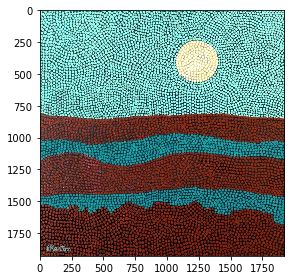

In [77]:
# Cargamos la imagen
original = io.imread('Pintura_Puntos.jpg')
# moon = io.imread('Moon.tiff')
io.imshow(original)

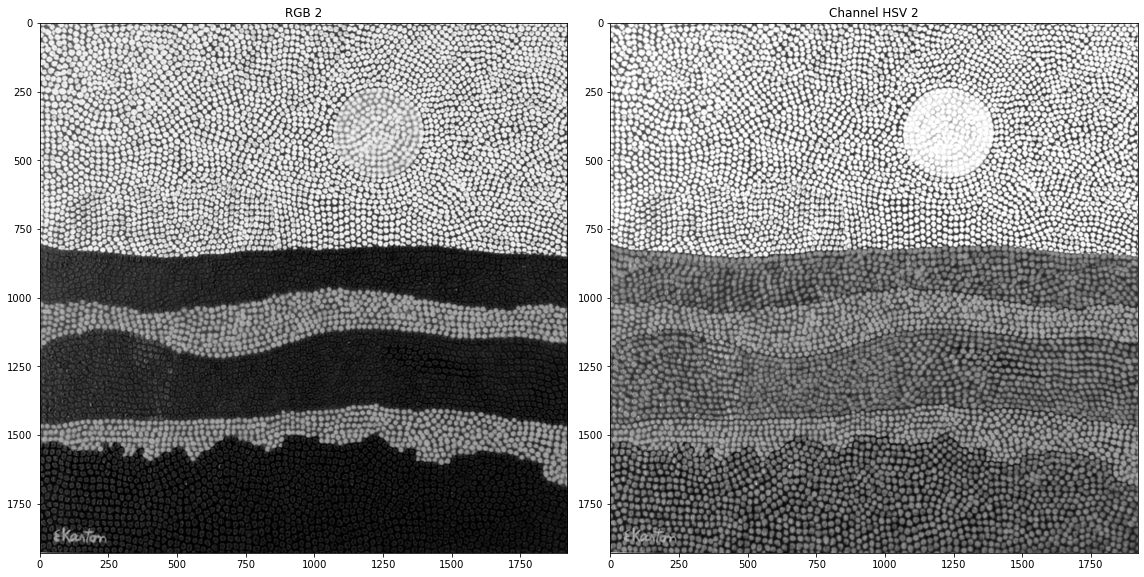

In [71]:
original_hsv = color.rgb2hsv(original)
# original_hsv = color.rgb2hed(original)
# original_hsv = color.rgb2yuv(original) # El canal 0 de este no tiene mala pinta
# original_hsv = color.rgb2xyz(original)

f, axes = plt.subplots(1, 2, figsize=(16, 16))
axes[0].imshow(original[:,:,2], cmap='gray', aspect='equal')
axes[0].set_title('RGB 2')
axes[1].imshow(original_hsv[:,:,2], cmap='gray', aspect='equal')
axes[1].set_title('Channel HSV 2')
plt.tight_layout()
plt.show()


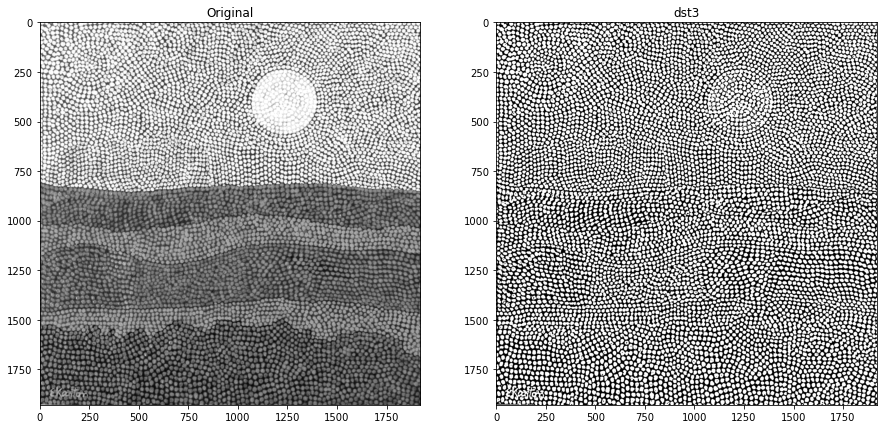

In [72]:
from skimage.filters import threshold_otsu
from skimage.filters import threshold_minimum

# Convertimos a espacio de color HSV y nos quedamos con el segundo canal
#gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
hsv_image = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)
gris = v

#gris = cv2.medianBlur(gris, 5)
#dst2 = cv2.adaptiveThreshold(gris, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
dst3 = cv2.adaptiveThreshold(gris, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 3)

fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(gris, cmap=plt.cm.gray)
ax[0].set_title('Original')

#ax[1].imshow(dst2, cmap=plt.cm.gray)
#ax[1].set_title('dst2')
ax[1].imshow(dst3, cmap=plt.cm.gray)
ax[1].set_title('dst3')

# Aplicar suavizado Gaussiano
#gauss = cv2.GaussianBlur(dst3, (5,5), 0)
gauss = dst3

0 255


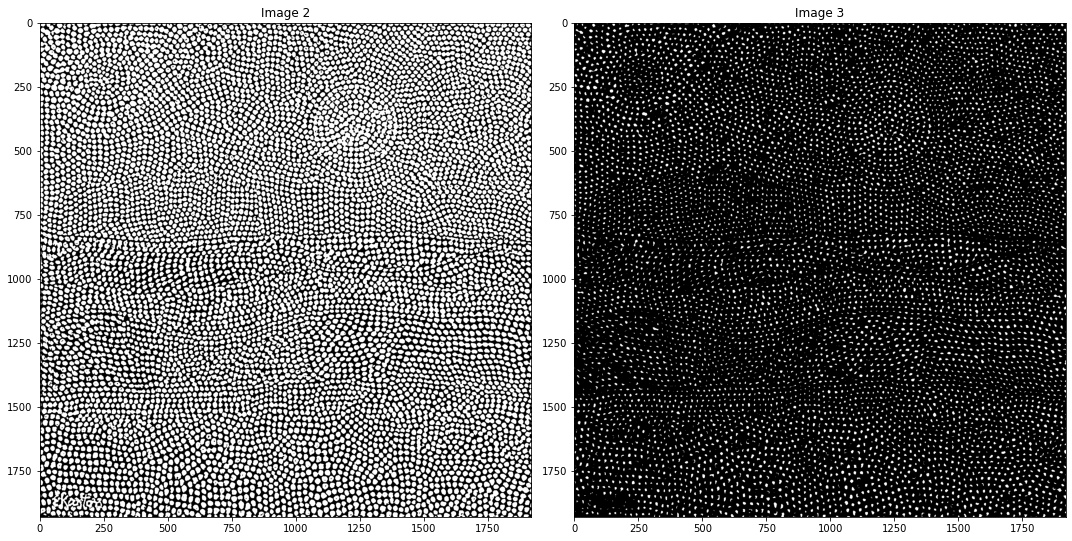

In [78]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle, star
from scipy import ndimage as ndi

print(np.min(gauss), np.max(gauss))
# Aplicamos filtros morfológicos. 
# NOTA: dependiendo de la versión de skimage quizás debas sustituir el flag selem por footprint. 
#       En este notebook se ha usado la 0.18.3

# Opción 1: produce 7643 objetos y una buena imagen de salida
#im2 = erosion(image=gauss, selem=disk(5))
#im3 = dilation(image=im2, selem=disk(3))

# Opción 2: produce 8495 objetos y una buena imagen de salida, posiblemente mejor
im2 = opening(image=gauss, selem=disk(2))
im3 = erosion(image=im2, selem=disk(5))


f, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(im2, cmap='gray', aspect='equal')
axes[0].set_title('Image 2')
axes[1].imshow(im3, cmap='gray', aspect='equal')
axes[1].set_title('Image 3')

plt.tight_layout()
plt.show()

<class 'numpy.ndarray'>
3705600


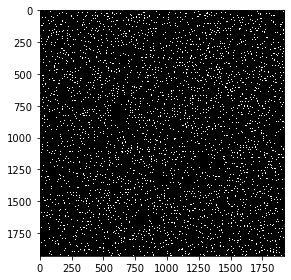

In [79]:
# Detectamos los bordes con Canny
canny = cv2.Canny(im3, 100, 100)
 
io.imshow(canny)

print(type(im3))
print(np.size(im3))


In [80]:
# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
# Mostramos el número de puntos por consola
print("He encontrado {} objetos".format(len(contornos)))
 
# Descomenta estas líneas si quieres mostrar la imagen a pantalla completa
#cv2.namedWindow("contornos", cv2.WND_PROP_FULLSCREEN)
#cv2.setWindowProperty("contornos",cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)

cv2.drawContours(original,contornos,-1,(0,0,255), 2)
cv2.imshow("contornos", original)
 
cv2.waitKey(0)

cv2.destroyAllWindows()

He encontrado 8997 objetos
